In [1]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print pruebas
print datasets
print dataframe_columns

['baseline', 'msda', 'gfk', 'pca', 'sda']
['amazon', 'twitter']
['Adaptacion', 'Tarea', 'Fuente', 'Objetivo', 'Baseline error', 'Transfer error', 'Transfer loss']


In [3]:
def get_scores_dataframe(dataset):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, prueba, dataset+'.csv')
                
        if os.path.exists(path):
            #print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Gráficos del dataset Amazon

In [4]:
df_amazon = get_scores_dataframe(datasets[0])
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,3.00,0.25,4.50,6.00,3.25
b->e,6.75,5.25,9.25,22.50,7.25
b->k,10.00,7.25,10.50,20.00,10.75
d->b,11.50,11.00,10.25,12.25,9.50
d->e,11.75,10.25,14.50,10.00,12.00
d->k,7.75,8.50,7.50,15.00,8.50
e->b,13.25,13.75,14.00,16.25,12.25
e->d,9.00,4.50,11.50,13.25,8.75
e->k,2.00,2.25,4.75,8.50,2.50


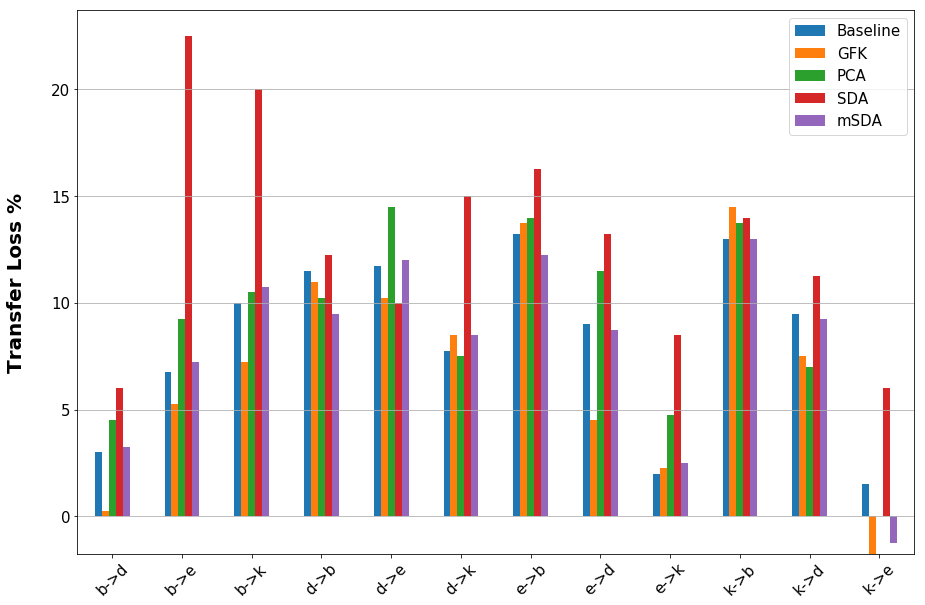

In [51]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(15,10), rot=45, fontsize=15, legend=False)
patches, labels = ax.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("")

# Gráficos del dataset Twitter

In [30]:
df_twitter = get_scores_dataframe(datasets[1])
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
r->t,5.384615,11.538462,6.923077,19.230769,10.769231
t->r,2.083333,13.541667,2.083333,20.833333,0.000000


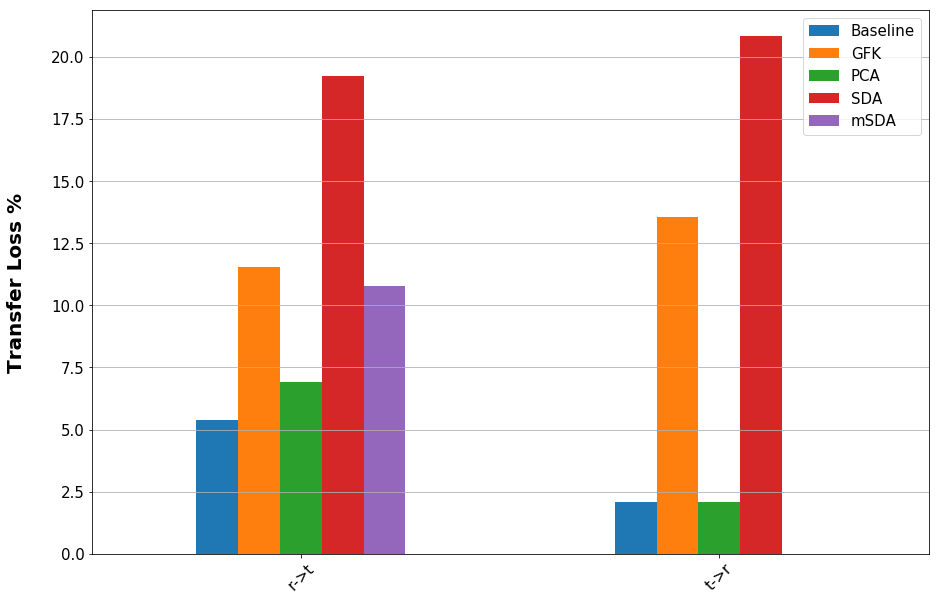

In [52]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(15,10), rot=45, fontsize=15, legend=False)
patches, labels = ax.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("")